In [60]:
import numpy as np
import pandas as pd
import optuna
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


In [61]:
df=pd.read_csv('Titanic-Dataset.csv')

In [62]:
df1=df.drop(columns=['PassengerId','Cabin','Ticket'],axis=1)

In [63]:
x=df1.drop('Survived',axis=1)

In [64]:
x

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [65]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
trs=ColumnTransformer([
    ('1',SimpleImputer(strategy='mean'),['Age']),
    # ('2',SimpleImputer(strategy='most_frequent'),['Emb']),
    ('3',OneHotEncoder(sparse_output=False,handle_unknown='ignore',drop='first'),['Sex',"Embarked"]),
    ('4',MinMaxScaler(),['Age','Fare'])
],remainder='passthrough')

In [66]:
# x=pd.DataFrame(x)
# type(x)

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [68]:
c=x.columns
c



Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [69]:
x=trs.fit_transform(x)

In [70]:
x.shape

(891, 11)

In [71]:
x=pd.DataFrame(x,columns=trs.get_feature_names_out(c))

In [72]:
x

,1__Age,3__Sex_male,3__Embarked_Q,3__Embarked_S,3__Embarked_nan,4__Age,4__Fare,remainder__Pclass,remainder__Name,remainder__SibSp,remainder__Parch
0,22.0,1.0,0.0,1.0,0.0,0.271174,0.014151,3,"Braund, Mr. Owen Harris",1,0
1,38.0,0.0,0.0,0.0,0.0,0.472229,0.139136,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0
2,26.0,0.0,0.0,1.0,0.0,0.321438,0.015469,3,"Heikkinen, Miss. Laina",0,0
3,35.0,0.0,0.0,1.0,0.0,0.434531,0.103644,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0
4,35.0,1.0,0.0,1.0,0.0,0.434531,0.015713,3,"Allen, Mr. William Henry",0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,1.0,0.0,1.0,0.0,0.334004,0.025374,2,"Montvila, Rev. Juozas",0,0
887,19.0,0.0,0.0,1.0,0.0,0.233476,0.058556,1,"Graham, Miss. Margaret Edith",0,0
888,29.699118,0.0,0.0,1.0,0.0,NaN,0.045771,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2
889,26.0,1.0,0.0,0.0,0.0,0.321438,0.058556,1,"Behr, Mr. Karl Howell",0,0


In [73]:
x['family_member']=x['remainder__SibSp']+x['remainder__Parch']
new_df=x.drop(columns=['remainder__SibSp','remainder__Parch','remainder__Name','1__Age'],axis=1)

In [74]:
x


,1__Age,3__Sex_male,3__Embarked_Q,3__Embarked_S,3__Embarked_nan,4__Age,4__Fare,remainder__Pclass,remainder__Name,remainder__SibSp,remainder__Parch,family_member
0,22.0,1.0,0.0,1.0,0.0,0.271174,0.014151,3,"Braund, Mr. Owen Harris",1,0,1
1,38.0,0.0,0.0,0.0,0.0,0.472229,0.139136,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,1
2,26.0,0.0,0.0,1.0,0.0,0.321438,0.015469,3,"Heikkinen, Miss. Laina",0,0,0
3,35.0,0.0,0.0,1.0,0.0,0.434531,0.103644,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,1
4,35.0,1.0,0.0,1.0,0.0,0.434531,0.015713,3,"Allen, Mr. William Henry",0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,1.0,0.0,1.0,0.0,0.334004,0.025374,2,"Montvila, Rev. Juozas",0,0,0
887,19.0,0.0,0.0,1.0,0.0,0.233476,0.058556,1,"Graham, Miss. Margaret Edith",0,0,0
888,29.699118,0.0,0.0,1.0,0.0,NaN,0.045771,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,3
889,26.0,1.0,0.0,0.0,0.0,0.321438,0.058556,1,"Behr, Mr. Karl Howell",0,0,0


In [75]:
new_df

,3__Sex_male,3__Embarked_Q,3__Embarked_S,3__Embarked_nan,4__Age,4__Fare,remainder__Pclass,family_member
0,1.0,0.0,1.0,0.0,0.271174,0.014151,3,1
1,0.0,0.0,0.0,0.0,0.472229,0.139136,1,1
2,0.0,0.0,1.0,0.0,0.321438,0.015469,3,0
3,0.0,0.0,1.0,0.0,0.434531,0.103644,1,1
4,1.0,0.0,1.0,0.0,0.434531,0.015713,3,0
...,...,...,...,...,...,...,...,...
886,1.0,0.0,1.0,0.0,0.334004,0.025374,2,0
887,0.0,0.0,1.0,0.0,0.233476,0.058556,1,0
888,0.0,0.0,1.0,0.0,NaN,0.045771,3,3
889,1.0,0.0,0.0,0.0,0.321438,0.058556,1,0


In [76]:
y=df['Survived']
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   3__Sex_male        891 non-null    object
 1   3__Embarked_Q      891 non-null    object
 2   3__Embarked_S      891 non-null    object
 3   3__Embarked_nan    891 non-null    object
 4   4__Age             714 non-null    object
 5   4__Fare            891 non-null    object
 6   remainder__Pclass  891 non-null    object
 7   family_member      891 non-null    object
dtypes: object(8)
memory usage: 55.8+ KB


In [77]:
new_df.iloc[:,4:5]=SimpleImputer(missing_values=np.nan,strategy='mean').fit_transform(new_df.iloc[:,4:5])

In [78]:
new_df

,3__Sex_male,3__Embarked_Q,3__Embarked_S,3__Embarked_nan,4__Age,4__Fare,remainder__Pclass,family_member
0,1.0,0.0,1.0,0.0,0.271174,0.014151,3,1
1,0.0,0.0,0.0,0.0,0.472229,0.139136,1,1
2,0.0,0.0,1.0,0.0,0.321438,0.015469,3,0
3,0.0,0.0,1.0,0.0,0.434531,0.103644,1,1
4,1.0,0.0,1.0,0.0,0.434531,0.015713,3,0
...,...,...,...,...,...,...,...,...
886,1.0,0.0,1.0,0.0,0.334004,0.025374,2,0
887,0.0,0.0,1.0,0.0,0.233476,0.058556,1,0
888,0.0,0.0,1.0,0.0,0.367921,0.045771,3,3
889,1.0,0.0,0.0,0.0,0.321438,0.058556,1,0


In [79]:
new_df
print(type(x))

<class 'pandas.core.frame.DataFrame'>


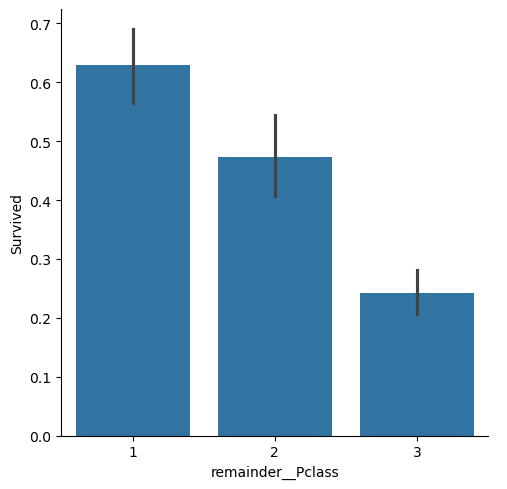

In [80]:
sns.catplot(x='remainder__Pclass',y=y,kind='bar',data=new_df)
# plt.scatter(new_df[''],)
# plt.scatter(new_df[''],)


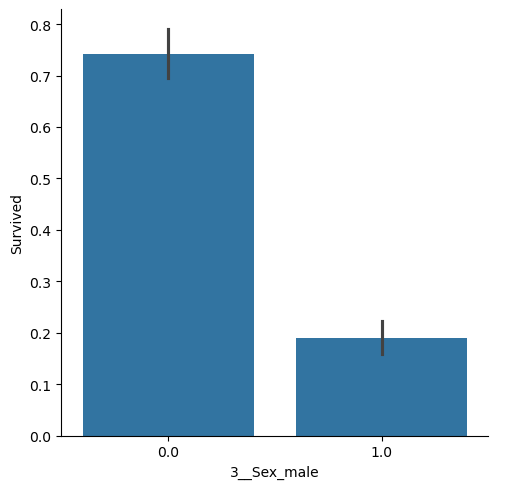

In [81]:
sns.catplot(x='3__Sex_male',y=y,kind='bar',data=new_df)

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost

In [83]:
clf1=LogisticRegression()
clf2=SVC()
clf3=RandomForestClassifier(n_estimators=12)
clf4=KNeighborsClassifier()


In [84]:
estimator=[('LogisticRegression',clf1),('SVC',clf2),('RandomForestClassifier',clf3),('KNeighborsClassifier',clf4)]

In [85]:
for i in estimator:
  X=cross_val_score(i[1],new_df,y,scoring='accuracy',cv=10)
  print(i[0],np.mean(X))

LogisticRegression 0.8002496878901372
SVC 0.8080898876404493
RandomForestClassifier 0.786828963795256
KNeighborsClassifier 0.7947066167290887


In [86]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=estimator,voting="hard")
X=cross_val_score(vc,new_df,y,scoring='accuracy',cv=10)
print(np.mean(X))

0.8126092384519351


In [87]:
for i in range(1,4):
  for j in range (1,4):
    for  k in range (1,4):
      for  m in range(1,4): 
      
       c=VotingClassifier(estimators=estimator,voting="hard",weights=[i,j,k,m])
       X=cross_val_score(c,new_df,y,cv=10,scoring="accuracy")
       print('for i={},j={},k={},m={}'.format(i,j,k,m),np.mean(X))

for i=1,j=1,k=1,m=1 0.8081273408239701
for i=1,j=1,k=1,m=2 0.8204993757802747
for i=1,j=1,k=1,m=3 0.8137578027465668
for i=1,j=1,k=2,m=1 0.8204744069912608
for i=1,j=1,k=2,m=2 0.8272034956304619
for i=1,j=1,k=2,m=3 0.8205243445692885
for i=1,j=1,k=3,m=1 0.8260923845193509
for i=1,j=1,k=3,m=2 0.823832709113608
for i=1,j=1,k=3,m=3 0.8182397003745319
for i=1,j=2,k=1,m=1 0.8069787765293382
for i=1,j=2,k=1,m=2 0.8047940074906366
for i=1,j=2,k=1,m=3 0.8171660424469414
for i=1,j=2,k=2,m=1 0.8159675405742821
for i=1,j=2,k=2,m=2 0.8193757802746567
for i=1,j=2,k=2,m=3 0.8171410736579275
for i=1,j=2,k=3,m=1 0.8283395755305868
for i=1,j=2,k=3,m=2 0.823832709113608
for i=1,j=2,k=3,m=3 0.8193632958801498
for i=1,j=3,k=1,m=1 0.8069662921348314
for i=1,j=3,k=1,m=2 0.8058676654182271
for i=1,j=3,k=1,m=3 0.8081148564294631
for i=1,j=3,k=2,m=1 0.8081023720349562
for i=1,j=3,k=2,m=2 0.8070162297128588
for i=1,j=3,k=2,m=3 0.8238576779026218
for i=1,j=3,k=3,m=1 0.817103620474407
for i=1,j=3,k=3,m=2 0.818277

In [88]:
vc=VotingClassifier(estimators=estimator,voting="hard",weights=[1,2,3,2])
X=cross_val_score(vc,new_df,y,scoring='accuracy',cv=20)
print(np.mean(X))



0.8271212121212121
